In [1]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob

In [2]:
ds=xr.open_dataset("/seq001/data/roms_ZeroForcing_0003_5daymn.nc")
ds
#roms_his_stratIni_0001.nc

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      Nuser: 1, eta_rho: 600, xi_rho: 800, eta_u: 600,
                      xi_u: 799, eta_v: 599, xi_v: 800, eta_psi: 599,
                      xi_psi: 799)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2009-01-03 ... 2009-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, Nuser, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/43)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    LtracerSrc       (tracer) int32 ...
    ...               ...
    lat_u            (eta_u, xi_u) float64 ...
    lat_v            (eta_v, xi_v) float64 ...
    lon_psi          (eta_psi, xi_psi) float64 ...
    lon_rho          (eta_rho, xi_rho) float64 ...
    lon_u            (eta_u, xi_u) float64 ...
    lon_v            (eta_v, xi_v) float64 ...
Attributes: (12/32)
    CDI:                        Climate Data Interface version 2.0.4 (https:/...
    Conventions:                CF-1.4, SGRID-0.3
    file:                       roms_his_0003.nc
    format:                     netCDF-3 64bit offset file
    type:                       ROMS grid file
    title:                      South-east Queensland, 1/100 (900m) degree re...
    ...                         ...
    history:                    Tue Feb 27 08:47:09 2024: ncks -A ROMS_grid_c...
    ana_file:                   ROMS/Functionals/ana_btflux.h, ROMS/Functiona...
    CPP_options:                SEQLD, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA...
    CDO:                        Climate Data Operators version 2.0.4 (https:/...
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    history_of_appended_files:  Tue Feb 27 08:47:09 2024: Appended file ROMS_...

In [3]:
#ds=ds.isel(ocean_time=slice(334,365))
ds=ds.set_coords(("lon_rho","lat_rho"))
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      Nuser: 1, eta_rho: 600, xi_rho: 800, eta_u: 600,
                      xi_u: 799, eta_v: 599, xi_v: 800, eta_psi: 599,
                      xi_psi: 799)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2009-01-03 ... 2009-12-29
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    lat_rho          (eta_rho, xi_rho) float64 ...
    lon_rho          (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: bnds, tracer, Nuser, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/41)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    LtracerSrc       (tracer) int32 ...
    ...               ...
    lat_psi          (eta_psi, xi_psi) float64 ...
    lat_u            (eta_u, xi_u) float64 ...
    lat_v            (eta_v, xi_v) float64 ...
    lon_psi          (eta_psi, xi_psi) float64 ...
    lon_u            (eta_u, xi_u) float64 ...
    lon_v            (eta_v, xi_v) float64 ...
Attributes: (12/32)
    CDI:                        Climate Data Interface version 2.0.4 (https:/...
    Conventions:                CF-1.4, SGRID-0.3
    file:                       roms_his_0003.nc
    format:                     netCDF-3 64bit offset file
    type:                       ROMS grid file
    title:                      South-east Queensland, 1/100 (900m) degree re...
    ...                         ...
    history:                    Tue Feb 27 08:47:09 2024: ncks -A ROMS_grid_c...
    ana_file:                   ROMS/Functionals/ana_btflux.h, ROMS/Functiona...
    CPP_options:                SEQLD, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA...
    CDO:                        Climate Data Operators version 2.0.4 (https:/...
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...
    history_of_appended_files:  Tue Feb 27 08:47:09 2024: Appended file ROMS_...

In [4]:
ds['hc']=20
def processROMSGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])



    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
    Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
    z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

    ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    # Other Option is to transpose arrays and fill NaNs with a minimal depth
    # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
    # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
    ds["z_rho0"] = ds.z_rho0.fillna(0)

        # interpolate depth of levels at U and V points
    ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
    ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')

    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

    ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
    ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
    ds['dz_u'] = grid.interp(ds.dz, 'X')
    ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
    ds['dz_v'] = grid.interp(ds.dz, 'Y')
    ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds

def makeROMSGridObject(gridIn):
    gridOut = Grid(gridIn, 
    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}},
    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    },
    periodic=False)
    
    return gridOut

ds = processROMSGrid(ds)

grid = makeROMSGridObject(ds)

In [5]:
ds["speed"]=np.sqrt(ds.u_eastward.squeeze()**2+ds.v_northward.squeeze()**2)

Text(0.5, 1.0, '')

<Figure size 640x480 with 0 Axes>

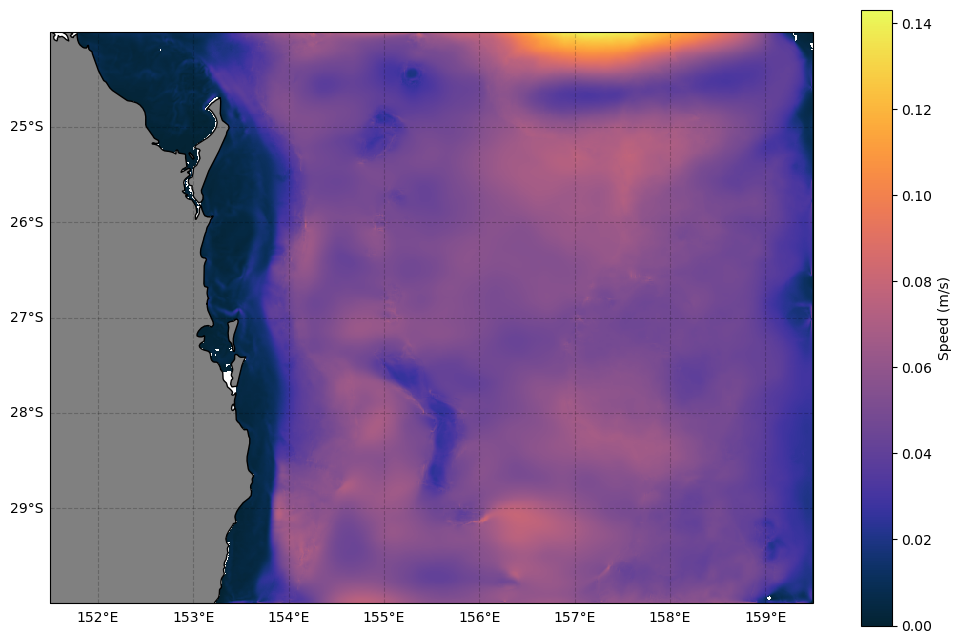

In [6]:
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12.3,8])
ax = None

ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.set_extent([151.5, 159.5, -30, -24])
Coast = cfeature.NaturalEarthFeature(category='physical',scale='10m',facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
im = ax.pcolormesh(ds.lon_rho,ds.lat_rho,ds.speed.mean(dim="s_rho").mean(dim="ocean_time"),cmap='cmo.thermal')
#im.set_clim(0,0.1)
gl = ax.gridlines(draw_labels=True,
                 color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.bottom_labels = True

cbar = fig.colorbar(im)
#ax.text(0.01, 0.99, 'a', transform=ax.transAxes,fontsize=22, fontweight='bold', va='top')
ax.set_title('')

cbar.set_label('Speed (m/s)')
ax.set_title('')  

<Figure size 640x480 with 0 Axes>

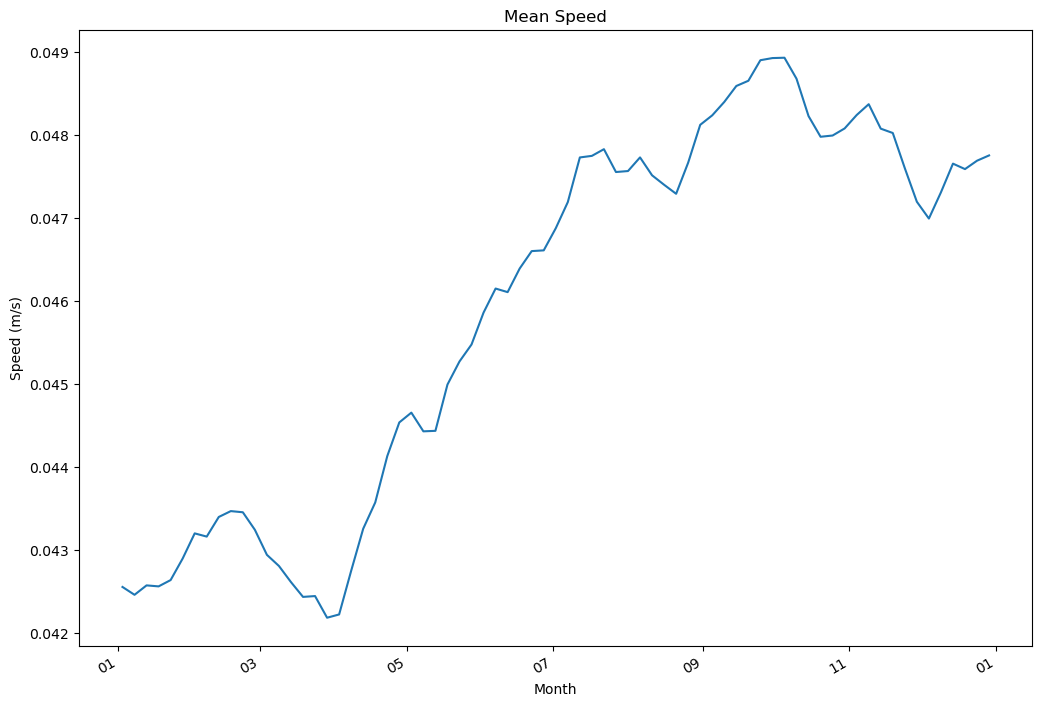

In [11]:
from matplotlib.dates import DateFormatter
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12.3,8])
ax = None

ax = fig.add_subplot(gs[0,0])
ds.speed.mean(dim=["s_rho","eta_rho","xi_rho"]).plot()
plt.title("Mean Speed")
plt.xlabel("Month")
plt.ylabel("Speed (m/s)")
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)

 ...]

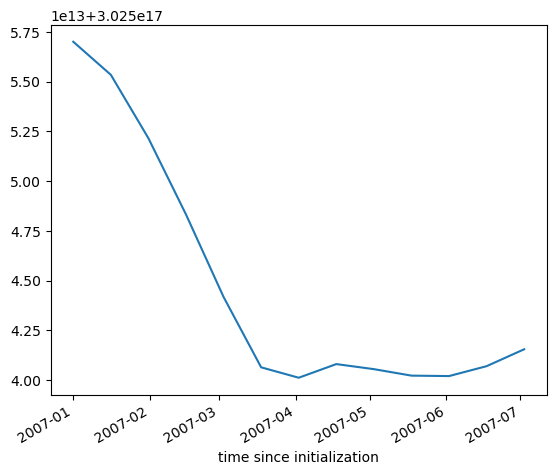

In [18]:
subset=ds.isel(s_rho=slice(20,30))
specific_heat_capacity = 3990  # J/(kg*K)
density0 = 1026  # kg/m^3 (reference seawater density)
specific_heat_capacity*grid.integrate((subset.temp*subset.rho), ['X','Y','Z']).plot()


In [5]:
ds['zmin']=ds.z_rho.min(dim=["s_rho"])

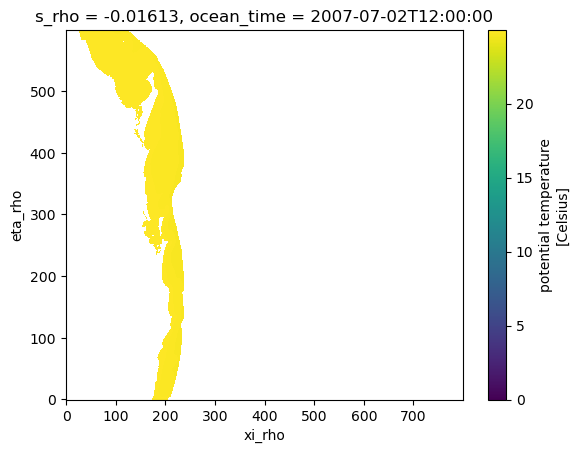

In [9]:
ds.temp.where((ds.zmin>-200)&(ds.lon_rho<154.5)).isel(s_rho=-1,ocean_time=-1).plot()

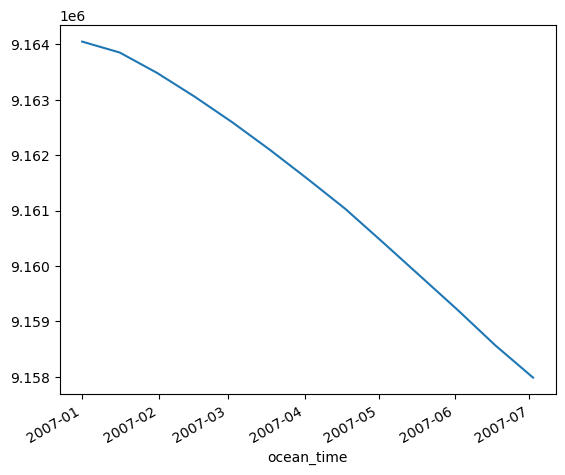

In [4]:
ds['zmin']=ds.z_rho.min(dim=["s_rho"])
sub_temp=ds.temp.where((ds.zmin>-200)&(ds.lon_rho<154.5))
sub_rho=ds.rho.where((ds.zmin>-200)&(ds.lon_rho<154.5))
specific_heat_capacity = 3990  # J/(kg*K)
density0 = 1026  # kg/m^3 (reference seawater density)
#grid.average(specific_heat_capacity*grid.integrate((sub_temp*sub_rho), ['Z']),['X','Y']).plot()
specific_heat_capacity*grid.integrate((sub_temp*sub_rho), ['X','Y','Z']).plot()